In [1]:
# -*- coding: utf-8 -*-

"""
This is an example to perform simple linear regression algorithm on the dataset (weight and height),
where x = weight and y = height.
"""
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from utilities.losses import compute_loss
from utilities.optimizers import gradient_descent, pso, mini_batch_gradient_descent
from sklearn.model_selection import train_test_split

# General settings
from utilities.visualization import visualize_train, visualize_test

In [2]:
seed = 309
# Freeze the random seed
random.seed(seed)
np.random.seed(seed)
train_test_split_test_size = 0.3

# Training settings
alpha = 0.1  # step size
max_iters = 50  # max iterations

In [3]:
# Load Data from CSV
# :return: df    a panda data frame
def load_data():
    df = pd.read_csv("../data/Part 3 - Outliers/Part2.csv")
    
    return df
#load_data()

In [4]:
def data_preprocess(data):
    """
    Data preprocess:
        1. Split the entire dataset into train and test
        2. Split outputs and inputs
        3. Standardize train and test
        4. Add intercept dummy for computation convenience
    :param data: the given dataset (format: panda DataFrame)
    :return: train_data       train data contains only inputs
             train_labels     train data contains only labels
             test_data        test data contains only inputs
             test_labels      test data contains only labels
             train_data_full       train data (full) contains both inputs and labels
             test_data_full       test data (full) contains both inputs and labels
    """
    # Split the data into train and test
    train_data, test_data = train_test_split(data, test_size = train_test_split_test_size)

    # Pre-process data (both train and test)
    train_data_full = train_data.copy()
    train_data = train_data.drop(["Height"], axis = 1)
    train_labels = train_data_full["Height"]

    test_data_full = test_data.copy()
    test_data = test_data.drop(["Height"], axis = 1)
    test_labels = test_data_full["Height"]

    # Standardize the inputs
    train_mean = train_data.mean()
    train_std = train_data.std()
    train_data = (train_data - train_mean) / train_std
    test_data = (test_data - train_mean) / train_std

    # Tricks: add dummy intercept to both train and test
    train_data['intercept_dummy'] = pd.Series(1.0, index = train_data.index)
    test_data['intercept_dummy'] = pd.Series(1.0, index = test_data.index)
    return train_data, train_labels, test_data, test_labels, train_data_full, test_data_full

In [5]:
def learn(y, x, theta, max_iters, alpha, optimizer_type = "BGD", metric_type = "MSE"):
    """
    Learn to estimate the regression parameters (i.e., w and b)
    :param y:                   train labels
    :param x:                   train data
    :param theta:               model parameter
    :param max_iters:           max training iterations
    :param alpha:               step size
    :param optimizer_type:      optimizer type (default: Batch Gradient Descient): GD, SGD, MiniBGD or PSO
    :param metric_type:         metric type (MSE, RMSE, R2, MAE). NOTE: MAE can't be optimized by GD methods.
    :return: thetas              all updated model parameters tracked during the learning course
             losses             all losses tracked during the learning course
    """
    thetas = None
    losses = None
    if optimizer_type == "BGD":
        thetas, losses = gradient_descent(y, x, theta, max_iters, alpha, metric_type)
    elif optimizer_type == "MiniBGD":
        thetas, losses = mini_batch_gradient_descent(y, x, theta, max_iters, alpha, metric_type, mini_batch_size = 10)
    elif optimizer_type == "PSO":
        thetas, losses = pso(y, x, theta, max_iters, 100, metric_type)
    else:
        raise ValueError(
            "[ERROR] The optimizer '{ot}' is not defined, please double check and re-run your program.".format(
                ot = optimizer_type))
    return thetas, losses

BGD(0/49): loss=131.4188114173029, w=5.906992270524939, b=32.854702854325716
BGD(1/49): loss=105.13504913384232, w=10.6359615110995, b=59.13846513778629
BGD(2/49): loss=84.10803930707387, w=14.42183917169664, b=80.16547496455476
BGD(3/49): loss=67.2864314456591, w=17.45270465883756, b=96.98708282596954
BGD(4/49): loss=53.829145156527304, w=19.879128971685823, b=110.44436911510135
BGD(5/49): loss=43.06331612522184, w=21.82165495014321, b=121.21019814640681
BGD(6/49): loss=34.468900832437235, w=23.37678574775396, b=129.82286137145118
BGD(7/49): loss=27.617993045684333, w=24.62177903201263, b=136.71299195148669
BGD(8/49): loss=22.257386395206176, w=25.61848508415343, b=142.22509641551508
BGD(9/49): loss=18.23980491911382, w=26.416419472181587, b=146.6347799867378
BGD(10/49): loss=15.322269695194658, w=27.05522294511156, b=150.162526843716
BGD(11/49): loss=13.309881884507865, w=27.5666307540115, b=152.98472432929853
BGD(12/49): loss=11.918111510484087, w=27.97604923416511, b=155.2424823177

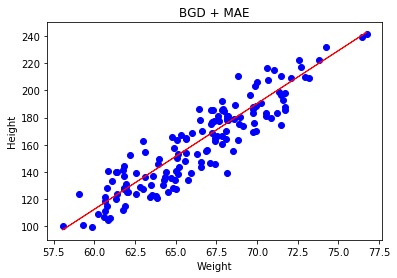

In [6]:
if __name__ == '__main__':
    # Settings
    metric_type = "MAE"  # MSE, RMSE, MAE, R2
    optimizer_type = "BGD"  # PSO, BGD, MiniBGD

    # Step 1: Load Data
    data = load_data()

    # Step 2: Preprocess the data
    train_data, train_labels, test_data, test_labels, train_data_full, test_data_full = data_preprocess(data)

    # Step 3: Learning Start
    theta = np.array([0.0, 0.0])  # Initialize model parameter
    #theta = np.random.randn(2,1)
    
    start_time = datetime.datetime.now()  # Track learning starting time
    thetas, losses = learn(train_labels.values, train_data.values, theta, max_iters, alpha, optimizer_type, metric_type)
    
    #plt.plot(losses)
    #print(thetas)
    end_time = datetime.datetime.now()  # Track learning ending time
    exection_time = (end_time - start_time).total_seconds()  # Track execution time

    # Step 4: Results presentation
    print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

    # Build baseline model
    print("R2: {:.2f}".format(-compute_loss(test_labels.values, test_data.values, thetas[-1], "R2")))  # R2 should be maximize
    print("MSE: {:.2f}".format(compute_loss(test_labels.values, test_data.values, thetas[-1], "MSE")))
    print("RMSE: {:.2f}".format(compute_loss(test_labels.values, test_data.values, thetas[-1], "RMSE")))
    print("MAE: {:.2f}".format(compute_loss(test_labels.values, test_data.values, thetas[-1], "MAE")))
    
    #Testing the results
    def predict(x, thetas):
        return x.dot(thetas)
    
    #Visualization Analysis
    plt.title(optimizer_type+" + "+metric_type)
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.scatter(x=test_data_full["Weight"],y=test_data_full["Height"],color='blue')
#     for i in range(max_iters):
#         thetas, losses = learn(train_labels.values, train_data.values, theta, i, alpha, optimizer_type, metric_type)
    pred_labels = predict(test_data, thetas[-1])
    plt.plot(test_data_full["Weight"],pred_labels,color='red',linewidth = 1)
    
#     plt.title(optimizer_type+" + "+metric_type + " interations 1-50")
#     plt.xlabel('Weight')
#     plt.ylabel('Height')
#     plt.plot(thetas,'-')
#     
#     plt.plot(losses,'-')